# Task 1

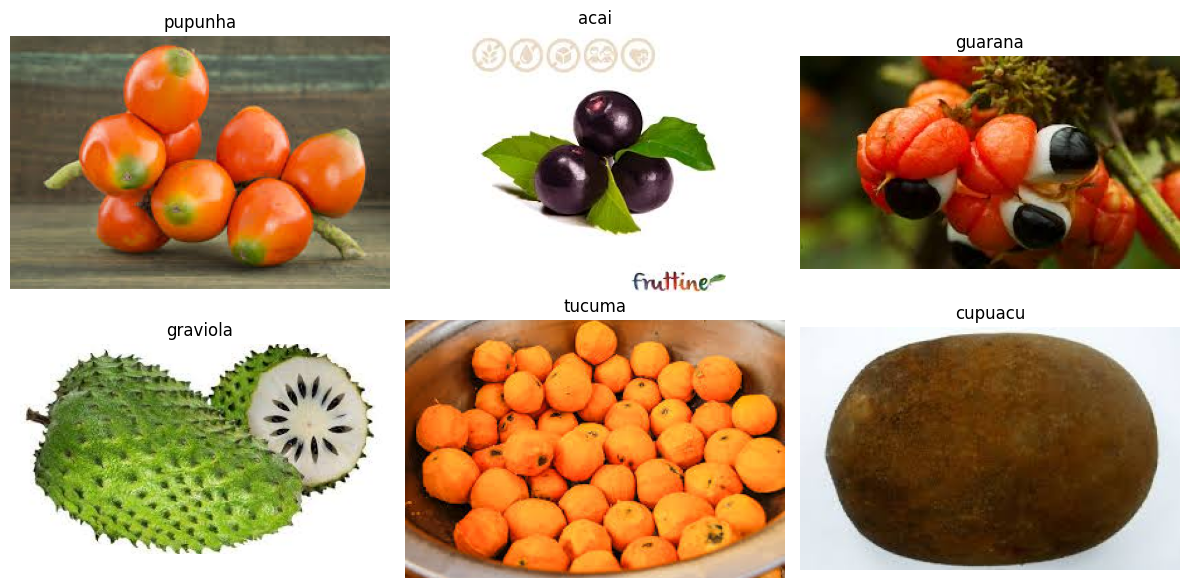

In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the dataset (Update this path as per your dataset location)
data_dir = "/content/drive/MyDrive/AI/week5/FruitinAmazon/train"

# Get the list of class directories
classes = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Select one random image from each class
selected_images = {}
for fruit_class in classes:
    class_dir = os.path.join(data_dir, fruit_class)
    image_files = [f for f in os.listdir(class_dir) if os.path.isfile(os.path.join(class_dir, f))]

    if image_files:  # Ensure there are images in the folder
        selected_images[fruit_class] = os.path.join(class_dir, random.choice(image_files))

# If no images were found, display an error message
if not selected_images:
    print("No images found in the dataset directory.")
else:
    # Use exactly 2 rows and 3 columns
    num_images = len(selected_images)
    num_cols = 3
    num_rows = 2  # Fix to 2 rows

    # Plot images in a grid format
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6))

    # Flatten axes for easy iteration
    axes = axes.flatten()

    # Display images
    for idx, (fruit_class, img_path) in enumerate(selected_images.items()):
        img = mpimg.imread(img_path)
        axes[idx].imshow(img)
        axes[idx].set_title(fruit_class)
        axes[idx].axis("off")

    # Hide unused subplots if there are less than 6 images
    for idx in range(num_images, len(axes)):
        axes[idx].axis("off")

    plt.tight_layout()
    plt.show()


In [2]:
import os
from PIL import Image

# Define the train dataset directory
data_dir = "/content/drive/MyDrive/AI/week5/FruitinAmazon/train"

# List to store corrupted images
corrupted_images = []

# Iterate through all class subdirectories
for fruit_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, fruit_class)

    if not os.path.isdir(class_dir):  # Skip if not a directory
        continue

    # Iterate through all images in the class directory
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)

        try:
            with Image.open(image_path) as img:
                img.verify()  # Verify if the image is valid
        except (IOError, SyntaxError):
            corrupted_images.append(image_path)
            os.remove(image_path)  # Remove corrupted image
            print(f"Removed corrupted image: {image_path}")

# Print the final message
if not corrupted_images:
    print("No Corrupted Images Found.")
else:
    print(f"Total {len(corrupted_images)} corrupted images removed.")


No Corrupted Images Found.


# Task 2

In [3]:
import tensorflow as tf

# Define paths and preprocessing parameters
train_dir = "/content/drive/MyDrive/AI/week5/FruitinAmazon/train"
img_height = 128  # Image height
img_width = 128   # Image width
batch_size = 32   # Batch size
validation_split = 0.2  # 80% training, 20% validation

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0,1]

# Load Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

# Normalize the Training Dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

# Normalize the Validation Dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Print dataset details
print(f"Training Dataset: {train_ds}")
print(f"Validation Dataset: {val_ds}")


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Training Dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation Dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


# Task 3

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define image size and number of classes
img_height = 128
img_width = 128
num_classes = 10  # Change based on your dataset

# Build the CNN Model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), strides=1, padding="same", activation="relu", input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(32, (3, 3), strides=1, padding="same", activation="relu"),
    layers.MaxPooling2D((2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),

    # Output Layer (Softmax for multi-class classification)
    layers.Dense(num_classes, activation="softmax")
])

# Compile the Model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# Print Model Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

# Task 4

In [5]:
# Compile the model
model.compile(optimizer='adam',                            # Adam optimizer
              loss='sparse_categorical_crossentropy',       # Sparse Categorical Crossentropy loss for multi-class classification
              metrics=['accuracy'])                        # Accuracy metric for evaluation


In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Set up callbacks
checkpoint = ModelCheckpoint('best_model.h5',
                             monitor='val_accuracy',   # Monitor validation accuracy
                             save_best_only=True,       # Save only the best model
                             mode='max',                # Save when validation accuracy improves
                             verbose=1)                 # Display saving model messages

early_stop = EarlyStopping(monitor='val_loss',             # Monitor validation loss for early stopping
                           patience=10,                   # Stop after 10 epochs with no improvement
                           restore_best_weights=True,     # Restore the best model's weights
                           verbose=1)                     # Display early stopping messages

# Train the model
history = model.fit(
    train_ds,                                             # Training dataset
    validation_data=val_ds,                                # Validation dataset
    epochs=250,                                            # Number of epochs to train
    batch_size=16,                                         # Batch size
    callbacks=[checkpoint, early_stop],                    # Callbacks for saving best model and stopping early
    verbose=1                                              # Display training progress
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 622ms/step - accuracy: 0.0394 - loss: 2.3548
Epoch 1: val_accuracy improved from -inf to 0.66667, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 971ms/step - accuracy: 0.0434 - loss: 2.3546 - val_accuracy: 0.6667 - val_loss: 2.0511
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step - accuracy: 0.3756 - loss: 2.1070
Epoch 2: val_accuracy did not improve from 0.66667
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 539ms/step - accuracy: 0.3720 - loss: 2.0951 - val_accuracy: 0.4444 - val_loss: 1.6738
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.3738 - loss: 1.7902
Epoch 3: val_accuracy improved from 0.66667 to 0.77778, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 557ms/step - accuracy: 0.3811 - loss: 1.7791 - val_accuracy: 0.7778 - val_loss: 1.0680
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.4491 - loss: 1.3758
Epoch 4: val_accuracy did not improve from 0.77778
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 533ms/step - accuracy: 0.4549 - loss: 1.3640 - val_accuracy: 0.3333 - val_loss: 1.3559
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.5885 - loss: 1.0392
Epoch 5: val_accuracy did not improve from 0.77778
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 531ms/step - accuracy: 0.5977 - loss: 1.0420 - val_accuracy: 0.6111 - val_loss: 0.9507
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 599ms/step - accuracy: 0.6916 - loss: 0.8541
Epoch 6: val_accuracy did not improve from 0.77778
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 762ms/step - accuracy: 0.6819 - loss: 0.8607 - val_accuracy: 0.7778 - val_loss: 0.6628
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.8351 - loss: 0.5978
Epoch 7: val_accuracy did not improve from 0.77

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 821ms/step - accuracy: 1.0000 - loss: 0.1454 - val_accuracy: 0.8889 - val_loss: 0.3741
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 552ms/step - accuracy: 0.9705 - loss: 0.1674
Epoch 13: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 724ms/step - accuracy: 0.9674 - loss: 0.1701 - val_accuracy: 0.8333 - val_loss: 0.3304
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.9954 - loss: 0.1192
Epoch 14: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 517ms/step - accuracy: 0.9931 - loss: 0.1238 - val_accuracy: 0.8333 - val_loss: 0.5397
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.9902 - loss: 0.0808
Epoch 15: val_accuracy did not improve from 0.88889
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 544ms/step - accuracy: 0.9891 - loss: 0.0834 - val_accuracy: 0.7778 - val_loss: 0.7757
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9797 - loss: 0.0857
Epoch 16: val_accuracy did not improve f

# Task 5: Model Evaluation

In [11]:
import tensorflow as tf

# Define image size and batch size
img_height = 128  # Example image height
img_width = 128  # Example image width
batch_size = 16  # Batch size for test set

# Path to your test directory
test_dir = "/content/drive/MyDrive/AI/week5/FruitinAmazon/test"  # Update this with the correct path to your test images

# Evaluate the model on the test dataset
# Assuming val_ds is used as the test set
test_loss, test_accuracy = model.evaluate(val_ds)

# Print test results
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.8333 - loss: 0.3304
Test Accuracy: 83.33%
Test Loss: 0.3304


# Task 6

In [8]:
model.save('my_model.h5')
print("Model saved successfully!")


Model saved successfully!


In [14]:
# Import the necessary function to load the model
from tensorflow.keras.models import load_model

# Load the saved model from the .h5 file
loaded_model = load_model('my_model.h5')
print("Model loaded successfully!")

# Evaluate the loaded model on the test set
test_loss, test_accuracy = loaded_model.evaluate(test_ds, verbose=1)

# Print the evaluation results
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Model loaded successfully!
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6500 - loss: 105.1654
Test Loss: 132.3607
Test Accuracy: 0.6000


# Task 7

In [19]:
import numpy as np
from sklearn.metrics import classification_report

# Get the true labels for the test dataset
true_labels = []
for images, labels in test_ds:
    true_labels.extend(labels.numpy())

# Make predictions on the test dataset
predictions = model.predict(test_ds, verbose=1)

# Convert predicted probabilities to class labels using np.argmax
predicted_labels = np.argmax(predictions, axis=1)

# Generate the classification report
report = classification_report(true_labels, predicted_labels, target_names=test_ds.class_names)

# Print the classification report
print(report)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
              precision    recall  f1-score   support

        acai       0.56      1.00      0.71         5
     cupuacu       0.62      1.00      0.77         5
    graviola       1.00      0.40      0.57         5
     guarana       1.00      0.20      0.33         5
     pupunha       0.60      0.60      0.60         5
      tucuma       0.40      0.40      0.40         5

    accuracy                           0.60        30
   macro avg       0.70      0.60      0.56        30
weighted avg       0.70      0.60      0.56        30



In [16]:
!pip install seaborn

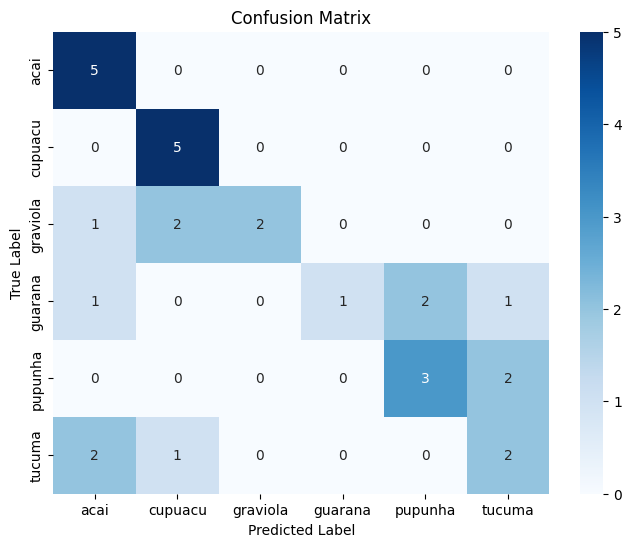

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define class names
class_names = test_ds.class_names  # ✅ Fix added here

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
